# DATA-DRIVEN VISUALIZATION AND PREDICTION OF HOTEL REVIEWS IN EUROPE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv("Hotel_Reviews.csv")

df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [2]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


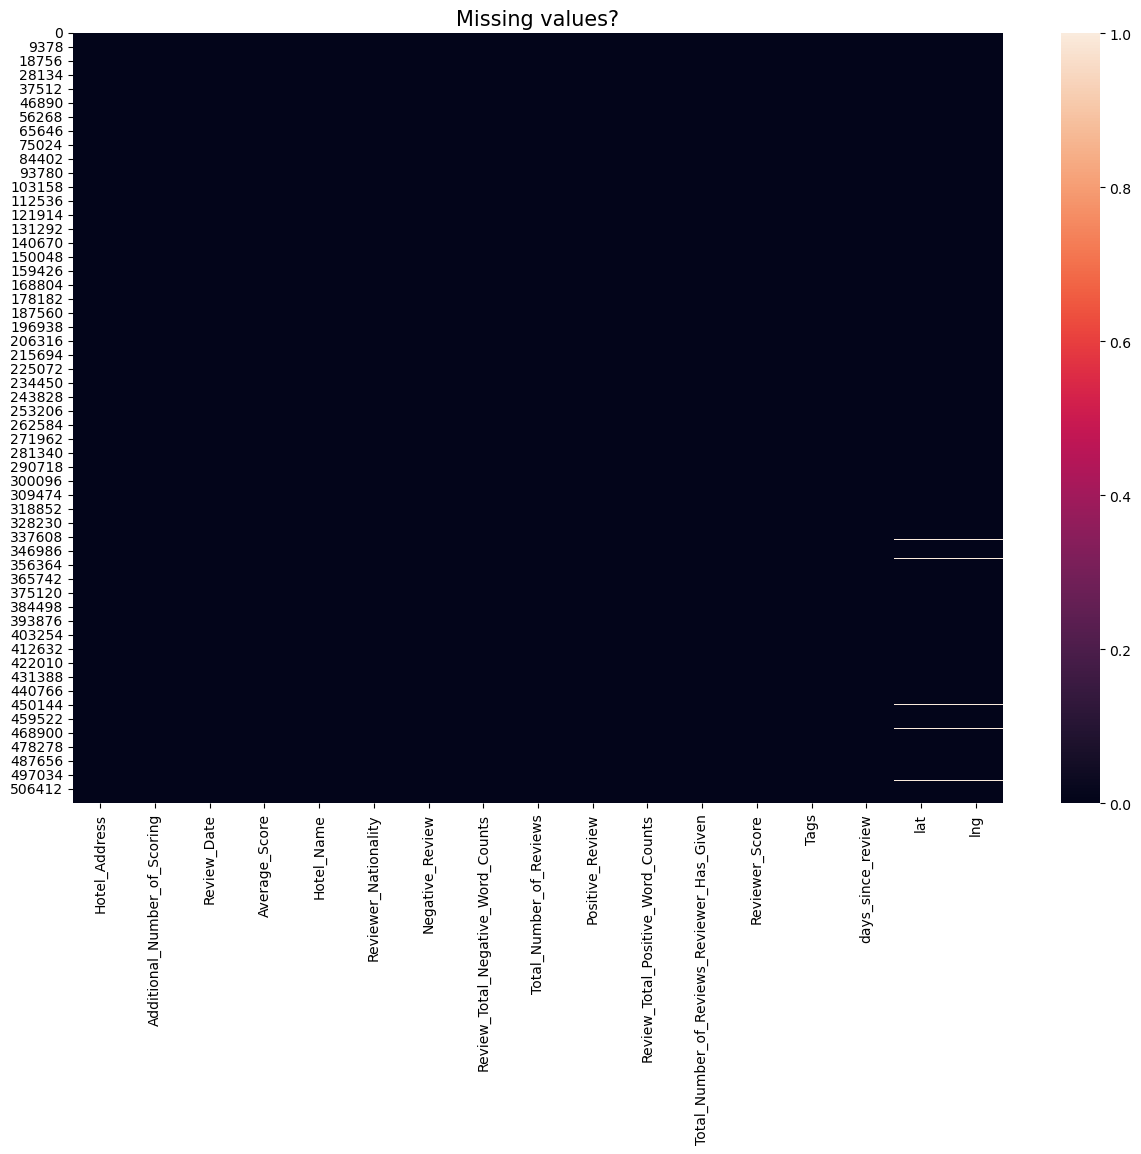

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.title("Missing values?", fontsize = 15)
plt.show()

Beside of a small quantity of missing values for the latitude and longitude, the dataset doesn't have missing values.

In [4]:
nb_missing = df[df["lat"].isnull() & df["lng"].isnull()].shape[0]
print(f"Number of reviews with no latitude or longitude: {nb_missing}\nTotal number of reviews: {df.shape[0]}")

Number of reviews with no latitude or longitude: 3268
Total number of reviews: 515738


# 2. Explorative analysis<a class="anchor" id="2"></a>

In [5]:
print("Number of hotels:",df['Hotel_Name'].nunique())

Number of hotels: 1492


C:\Users\user\AppData\Local\Temp\ipykernel_14756\1087336736.py:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


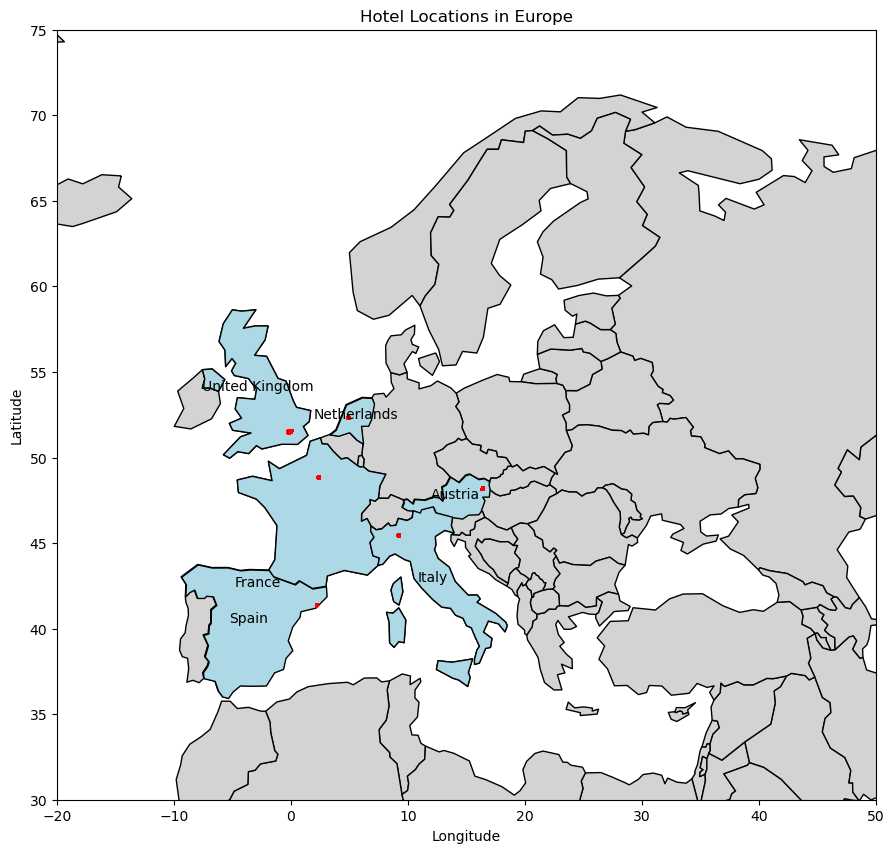

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv("Hotel_Reviews.csv")

# Remove rows with missing latitude or longitude
df = df.dropna(subset=['lat', 'lng'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lng, df.lat))

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.crs = 'epsg:4326'  # Updated CRS specification

# Plot the locations on a map of Europe
fig, ax = plt.subplots(figsize=(15, 10))

# Limit the plot to Europe
ax.set_xlim(-20, 50)  # Adjust the longitude limits for Europe
ax.set_ylim(30, 75)   # Adjust the latitude limits for Europe

# Plot world map with country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot countries without hotels in light gray
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Annotate countries with hotel locations and color them
countries_with_hotels = []
for idx, country in world.iterrows():
    # Check if the country has hotels
    country_hotels = gdf[gdf.geometry.within(country.geometry)]
    if not country_hotels.empty:
        countries_with_hotels.append(country['name'])
        # Color the country with hotels in light blue
        world[world['name'] == country['name']].plot(ax=ax, color='lightblue', edgecolor='black')
        # Annotate the country with its name
        plt.annotate(text=country['name'], xy=country.geometry.centroid.coords[0], horizontalalignment='center')

# Plot customer locations
gdf.plot(ax=ax, color='red', markersize=1)

plt.title('Hotel Locations in Europe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


WORD CLOUD NEGETIVE & POSITIVE REVIEWS

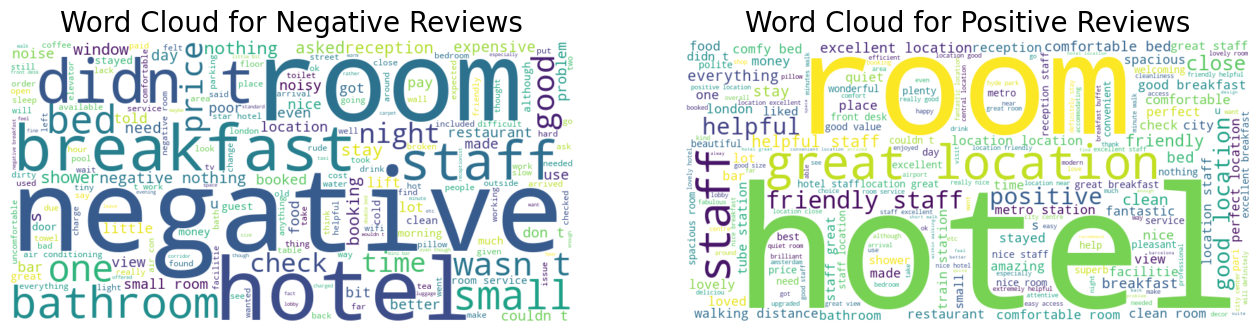

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Assuming df is your DataFrame
# Ensure you have the correct data types for numerical columns
df = df.copy()

# Convert the reviews to lower and delete leading/trailing space
df["Negative_Review"] = df["Negative_Review"].str.lower().str.strip()
df["Positive_Review"] = df["Positive_Review"].str.lower().str.strip()

# Combine all positive and negative reviews into one string
negative_reviews = ' '.join(df["Negative_Review"])
positive_reviews = ' '.join(df["Positive_Review"])

# Generate word clouds
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word clouds
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

axes[0].imshow(wordcloud_neg, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud for Negative Reviews', fontsize=20)

axes[1].imshow(wordcloud_pos, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud for Positive Reviews', fontsize=20)

plt.show()


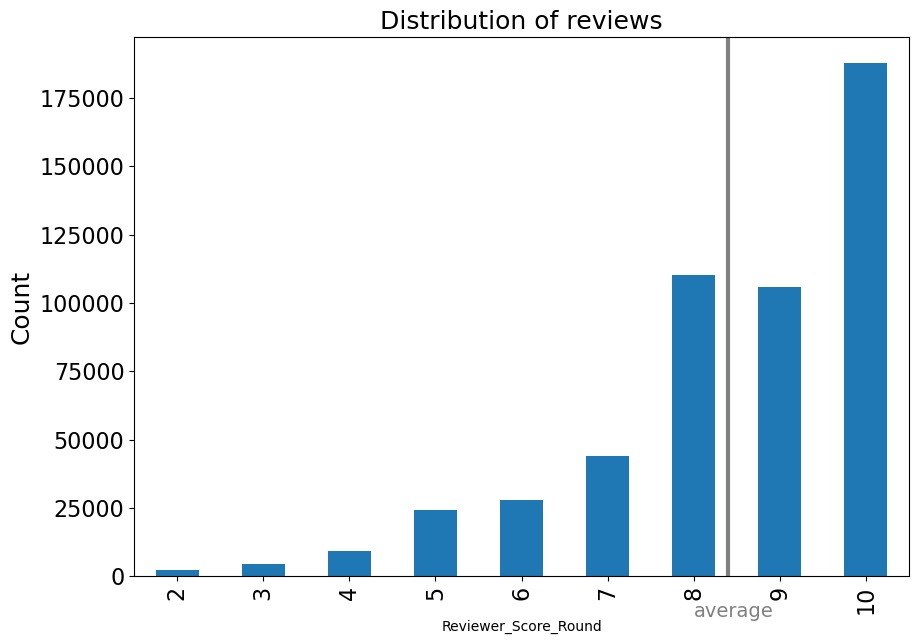

In [6]:
# Create a column with the rounded reviews
df["Reviewer_Score_Round"] = df["Reviewer_Score"].apply(lambda x: int(round(x)))

# Get the number of reviews with which scores
reviews_dist = df["Reviewer_Score_Round"].value_counts().sort_index()
bar = reviews_dist.plot.bar(figsize =(10,7))
plt.title("Distribution of reviews", fontsize = 18)
plt.axvline(df["Reviewer_Score"].mean()-2, 0 ,1, color = "grey", lw = 3)
plt.text(6, -15000, "average", fontsize = 14, color = "grey")
plt.ylabel("Count", fontsize = 18)
bar.tick_params(labelsize=16)

# Remove the column "Reviewer_Score_Round"
df.drop("Reviewer_Score_Round", axis = 1, inplace = True)

Most of the reviews are positives, therefore the average review score is 8.4/10. It is not similar to a normal distribution like we might expect. 

## Correlation:
Let's see the correlation between the variables.

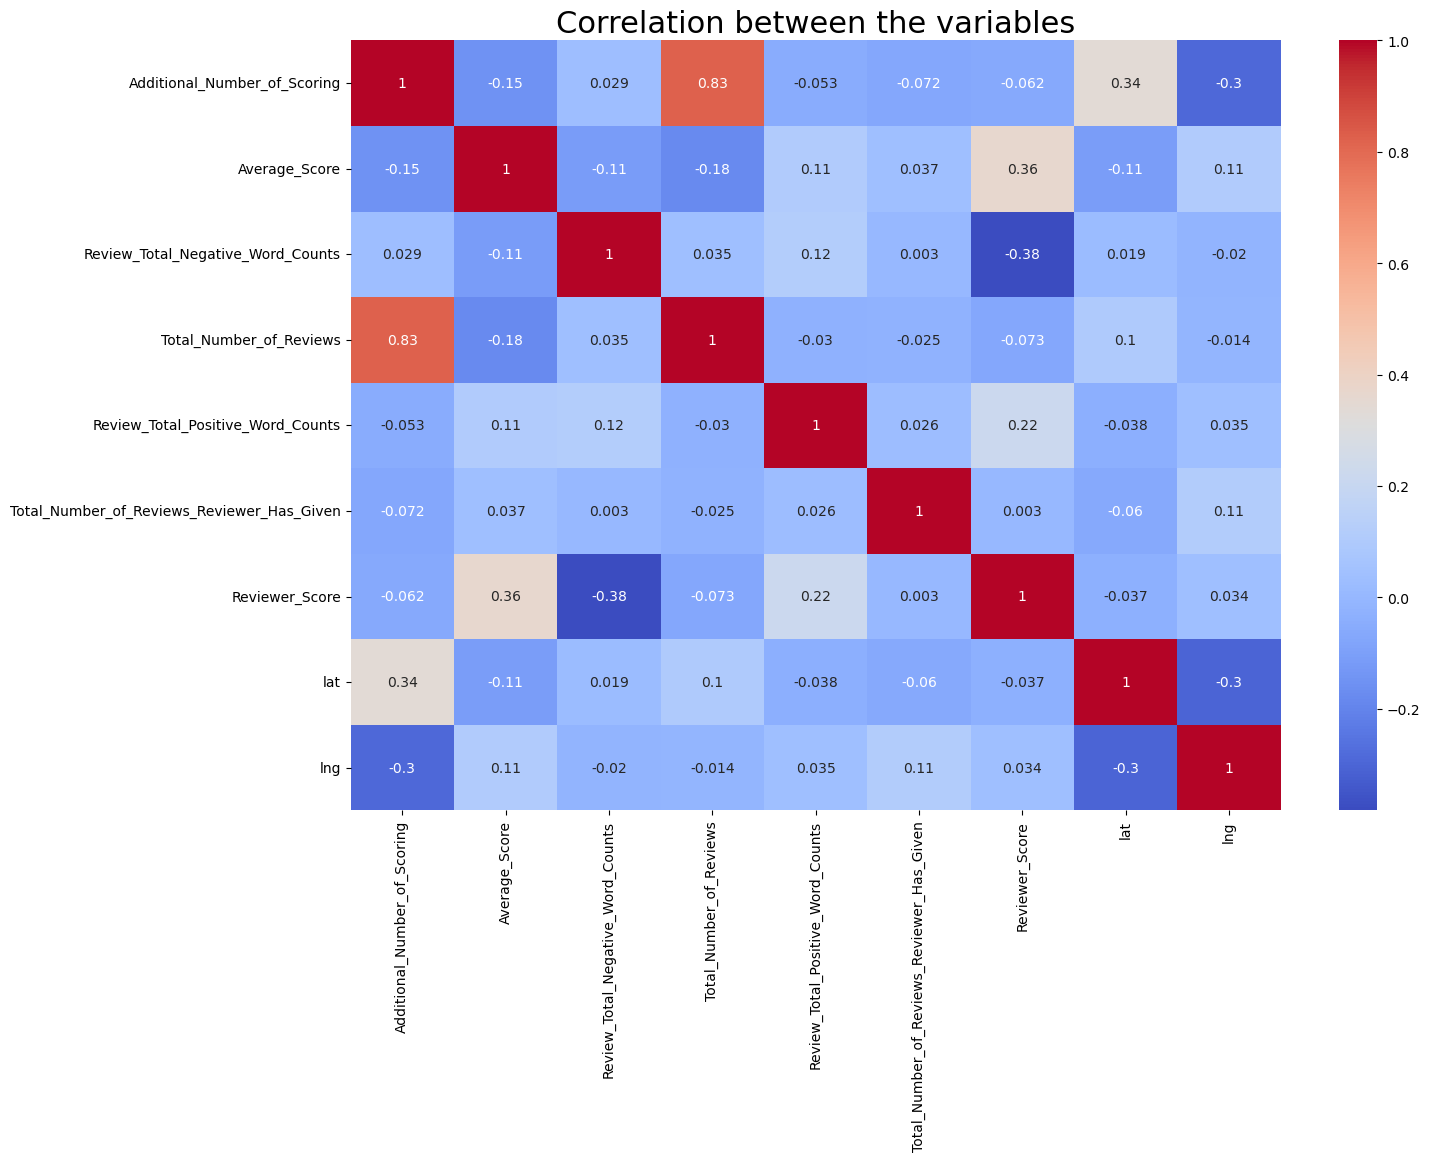

In [10]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
df_corr = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Correlation between the variables", fontsize=22)
plt.show()

Considering the number of variables in the representation of the correlation, we will only represent the correlation with reviewer_score.

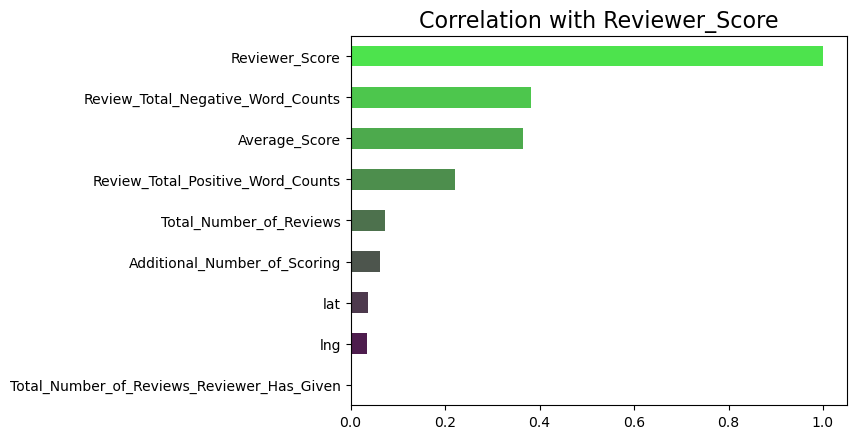

In [11]:
# Get the colors for the graphic
colors = []
dim = df_corr.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,r,0.3))

# Transform each value in a positive value, because what interesses us
# isn't the direction of the correlation but the absolute correlation
df_corr["Reviewer_Score"].apply(lambda x: abs(x)).sort_values().plot.barh(color = colors)
plt.title("Correlation with Reviewer_Score", fontsize = 16)
plt.show()

## Mean review score depending on the reviewer nationality

In [12]:
# Group the data by nationality
group_nationality = df.pivot_table(values = "Reviewer_Score", 
                                   index = "Reviewer_Nationality", 
                                   aggfunc=["mean","count"])
group_nationality.columns = ["mean_review","review_count"]

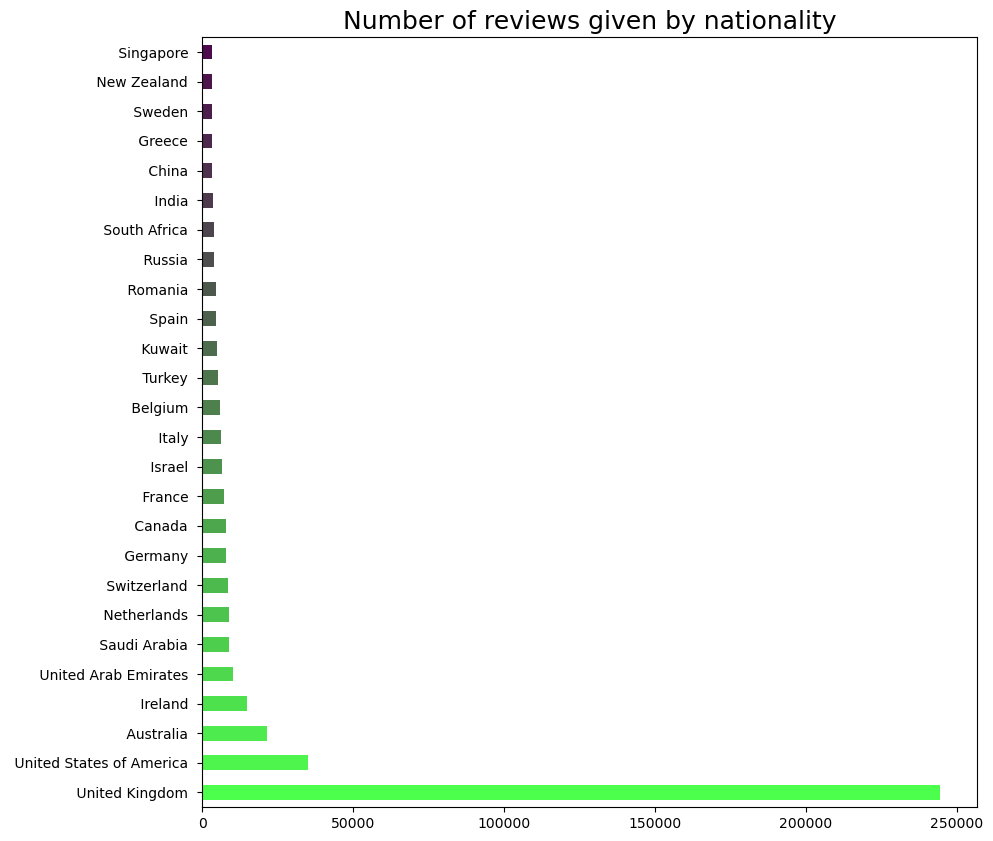

In [13]:
# Keep only the nationalities with at least 3000 reviews given
reviews_count=group_nationality[group_nationality["review_count"]>3000]["review_count"].sort_values(ascending = False)

# Get the colors for the graphic
colors = []
dim = reviews_count.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,1-r,0.3))

# Display the result
reviews_count.plot.barh(figsize=(10,10), color = colors)
plt.title("Number of reviews given by nationality", fontsize = 18)
plt.ylabel("")
plt.show()

Most of the reviews were made by a few countries.

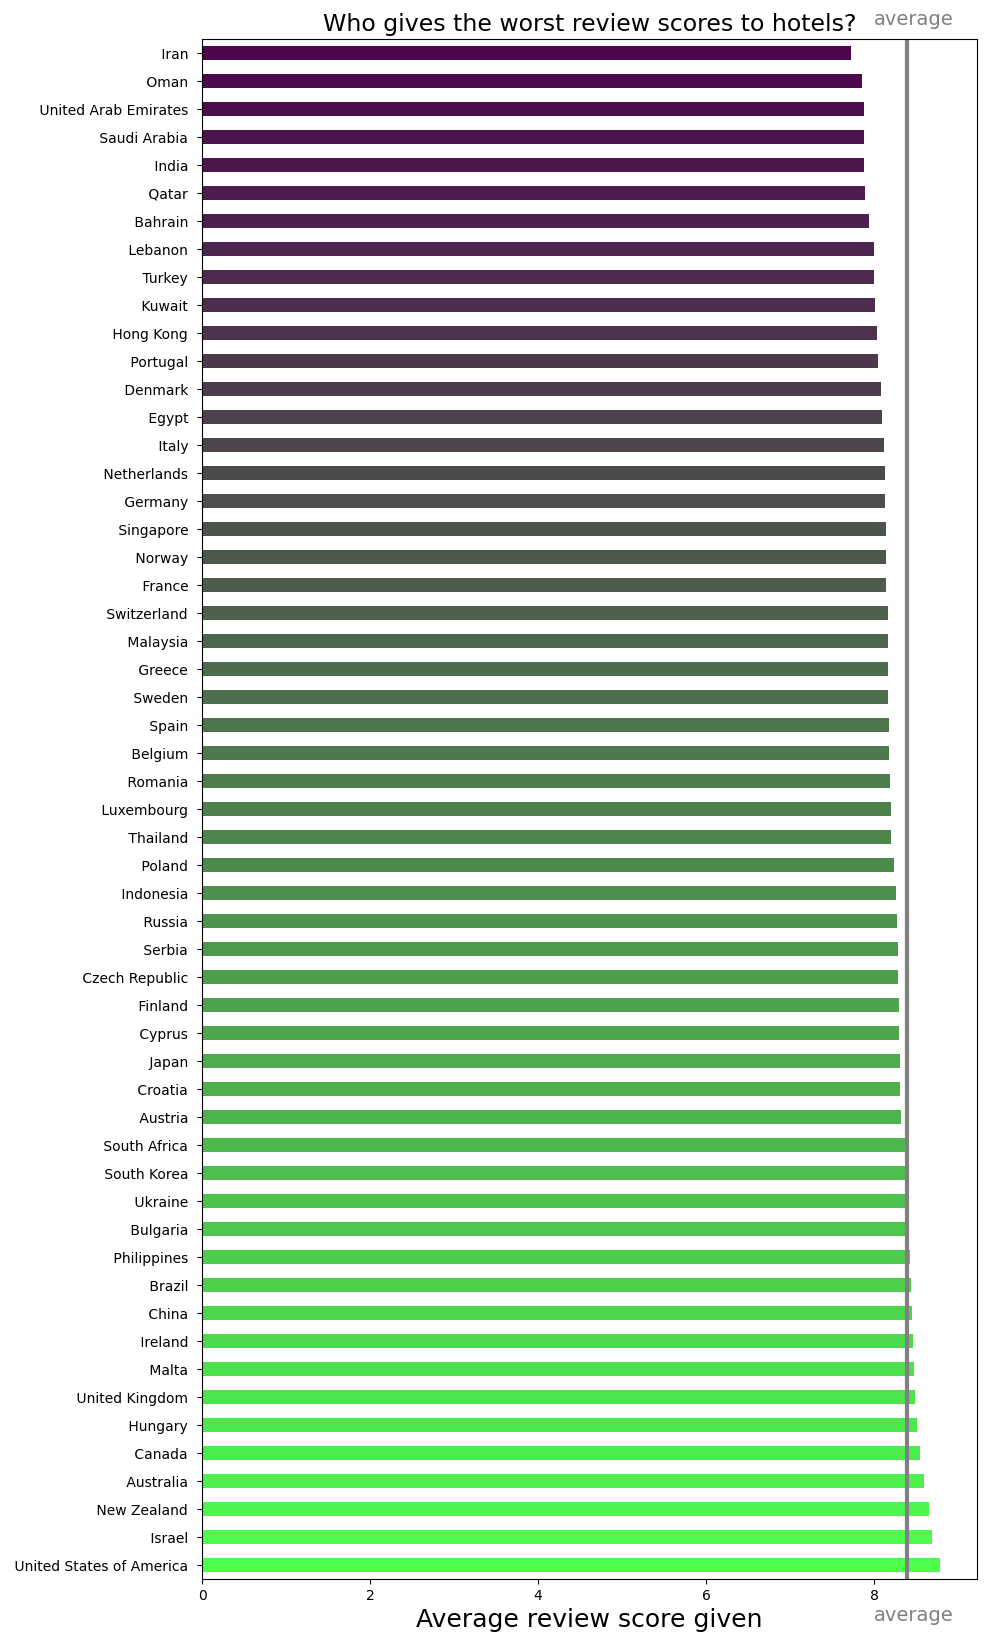

In [14]:
# Keep only the nationalities with at least 1000 reviews
group_nationality = group_nationality[group_nationality["review_count"] > 1000].sort_values(by = "mean_review", ascending = False)

# Get the colors for the graphic
colors = []
dim = group_nationality.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,1-r,0.3))

# Display the result
group_nationality["mean_review"].plot.barh(figsize = (10,20), color = colors)
plt.title("Who gives the worst review scores to hotels?", fontsize = 17)
plt.axvline(df["Reviewer_Score"].mean(), 0 ,1, color = "grey", lw = 3)
plt.text(8, 55, "average", fontsize = 14, c = "grey")
plt.text(8, -2, "average", fontsize = 14, c = "grey")
plt.xlabel("Average review score given", fontsize = 18)
plt.ylabel("")
plt.show()

In average, the English speaking countries give the best reviews scores with USA as number 1.

# 3. Prediction of the review score with supervised learning<a class="anchor" id="3"></a>
In this part we will train different models to predict the scores of the reviews based on the others variables.
Before we can build a model, some transformation is needed:


In [8]:
# Convert the reviews to lower and delete leading/trailing space
df["Negative_Review"] = df["Negative_Review"].str.lower().str.strip()
df["Positive_Review"] = df["Positive_Review"].str.lower().str.strip()

Each reviews text will be analysed with nltk. SentimentIntensityAnalyzer makes it possible to see if a text is positive or negative. For example:

In [9]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "The hotel was very good, I love it!"
rev2 = "It was just horrible, the worst ever."

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")


review 1:
The hotel was very good, I love it!
Score: {'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'compound': 0.8386}

review 2:
It was just horrible, the worst ever.
Score: {'neg': 0.603, 'neu': 0.397, 'pos': 0.0, 'compound': -0.8225}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The compound is the general positivity of a text. Above 0, it is positive and under 0, it is negative. This can be used to determine if a text is positive or negative.

Create two columns, one column for the polarity_scores of the positive reviews and one column for the negative ones. It might happen that the polarity_scores isn't accurate and to avoid issues in the model, the polarity_score will be only >= 0 for the positive reviews and <= 0 for the negative reviews.

In [10]:
# Take only a part of the data to speed up
# df = df[:50000].copy()

start_time = time.time()
pos = df["Positive_Review"].apply(lambda x: abs(sent_analyzer.polarity_scores(x)["compound"]))
neg = df["Negative_Review"].apply(lambda x: -abs(sent_analyzer.polarity_scores(x)["compound"]))

df["sentiment_score"] = pos + neg
df["polarity_pos"] = pos
df["polarity_neg"] = neg

time_model = time.time() - start_time
print(f"Execution time: {int(time_model)} seconds")

Execution time: 144 seconds


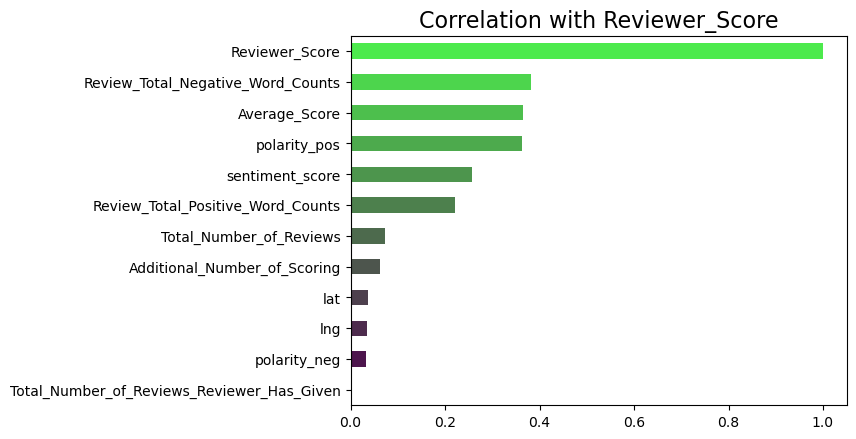

In [11]:
# Remove non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Get the colors for the graphic
colors = []
dim = df_corr.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3, r, 0.3))

# Transform each value into a positive value
df_corr["Reviewer_Score"].apply(lambda x: abs(x)).sort_values().plot.barh(color=colors)
plt.title("Correlation with Reviewer_Score", fontsize=16)
plt.show()


The variable which influences the most the reviewer score is the length of the negative review. It is logical, because if someone really didn't like a hotel, he might write a lot about it.

# DATA PREPARATION AND MODEL TRAINING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
​
​
# Ensure you have the correct data types for numerical columns
df = df.copy()
​
# Columns to use to train the models
cols = ['Review_Total_Negative_Word_Counts',
        'polarity_pos',
        'Average_Score',
        'Review_Total_Positive_Word_Counts']
​
X = df[cols].values
y = df["Reviewer_Score"].values
​
# Use StandardScaler to scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
​
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# MODEL TRAINING AND PERFORMANCE METRICS

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time

# Ensure you have the correct data types for numerical columns
df = df.copy()

# Columns to use to train the models
cols = ['Review_Total_Negative_Word_Counts',
        'polarity_pos',
        'Average_Score',
        'Review_Total_Positive_Word_Counts']

X = df[cols].values
y = df["Reviewer_Score"].values

# Use StandardScaler to scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Dictionary to store the performance metrics
performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store performance metrics
    performance[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2,
        'Training Time (s)': training_time
    }

# Print the performance metrics for each model
for model_name, metrics in performance.items():
    print(f"Model: {model_name}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R^2: {metrics['R^2']:.4f}")
    print(f"  Training Time: {metrics['Training Time (s)']:.2f}s")
    print()


Model: Linear Regression
  MSE: 1.7163
  RMSE: 1.3101
  R^2: 0.3592
  Training Time: 0.07s

Model: Gradient Boosting
  MSE: 1.4537
  RMSE: 1.2057
  R^2: 0.4572
  Training Time: 20.86s

Model: Random Forest
  MSE: 1.6505
  RMSE: 1.2847
  R^2: 0.3837
  Training Time: 102.92s



# PERFORMANCE EVALUATION

In [21]:
# Plotting functions
def plot_scatter(y_test, pred, model="Model"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, pred, alpha=0.3)
    plt.plot([0, 10], [0, 10], '--', color='red')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.title(f'Scatter plot of Actual vs. Predicted Scores\n{model}')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.show()

def plot_residuals(y_test, pred, model="Model"):
    residuals = y_test - pred
    plt.figure(figsize=(8, 6))
    plt.scatter(pred, residuals, alpha=0.3)
    plt.hlines(y=0, xmin=min(pred), xmax=max(pred), colors='red', linestyles='--')
    plt.xlabel('Predicted Scores')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot\n{model}')
    plt.show()

def plot_distribution(y_test, pred, model="Model"):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(y_test, label='Actual', shade=True)
    sns.kdeplot(pred, label='Predicted', shade=True)
    plt.xlabel('Scores')
    plt.title(f'Distribution of Actual vs. Predicted Scores\n{model}')
    plt.legend()
    plt.show()

In [22]:
def combined_plot(y_test, preds, model_names, plot_type):
    if plot_type == 'scatter':
        plt.figure(figsize=(12, 8))
        for pred, model in zip(preds, model_names):
            plt.scatter(y_test, pred, alpha=0.3, label=model)
        plt.plot([0, 10], [0, 10], '--', color='red')
        plt.xlabel('Actual Scores')
        plt.ylabel('Predicted Scores')
        plt.title('Scatter plot of Actual vs. Predicted Scores')
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.legend()
        plt.show()
    elif plot_type == 'residual':
        plt.figure(figsize=(12, 8))
        for pred, model in zip(preds, model_names):
            residuals = y_test - pred
            plt.scatter(pred, residuals, alpha=0.3, label=model)
        plt.hlines(y=0, xmin=min(preds[0]), xmax=max(preds[0]), colors='red', linestyles='--')
        plt.xlabel('Predicted Scores')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.legend()
        plt.show()
    elif plot_type == 'distribution':
        plt.figure(figsize=(12, 8))
        sns.kdeplot(y_test, label='Actual', shade=True)
        for pred, model in zip(preds, model_names):
            sns.kdeplot(pred, label=model, shade=True)
        plt.xlabel('Scores')
        plt.title('Distribution of Actual vs. Predicted Scores')
        plt.legend()
        plt.show()

In [28]:
# Train models and make predictions
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)
pred_gbr = model_gbr.predict(X_test)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

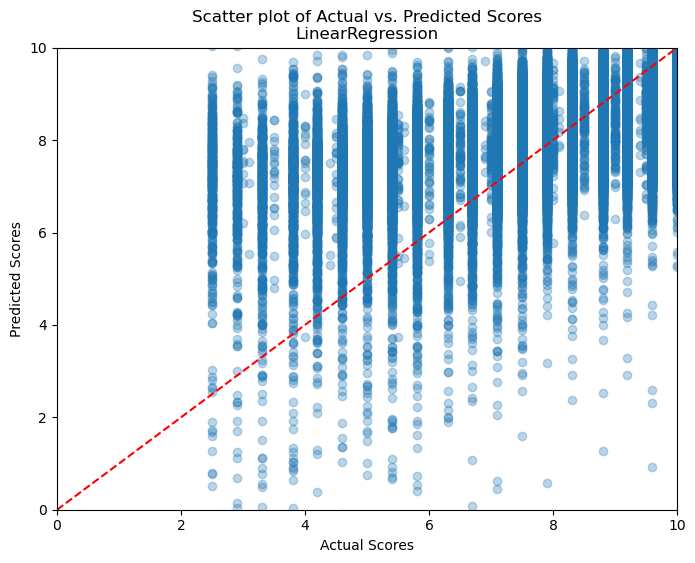

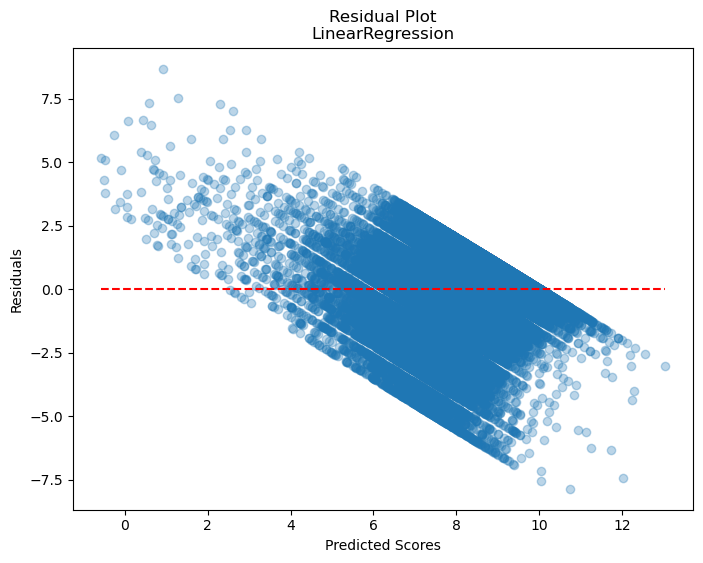

C:\Users\user\AppData\Local\Temp\ipykernel_14756\3186599264.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14756\3186599264.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, label='Predicted', shade=True)


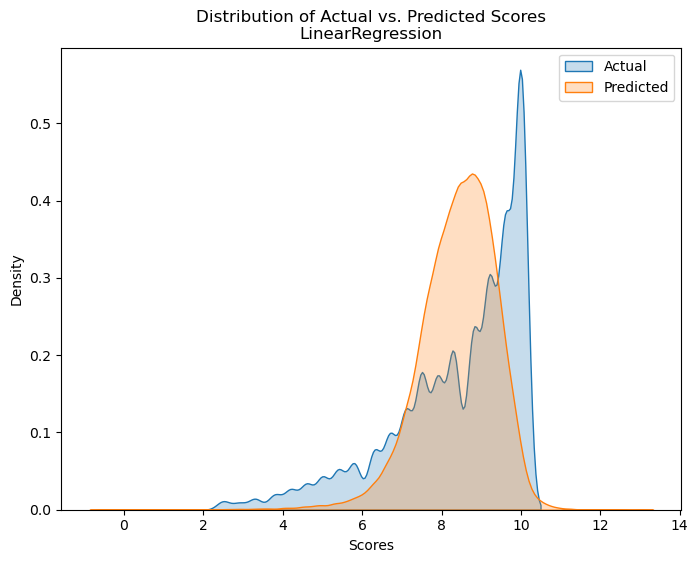

In [24]:
# Plot for Linear Regression
plot_scatter(y_test, pred_lr, model="LinearRegression")
plot_residuals(y_test, pred_lr, model="LinearRegression")
plot_distribution(y_test, pred_lr, model="LinearRegression")

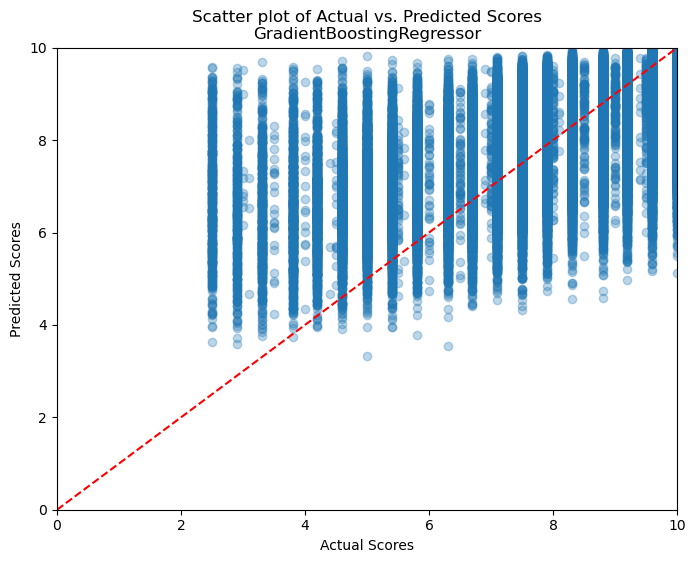

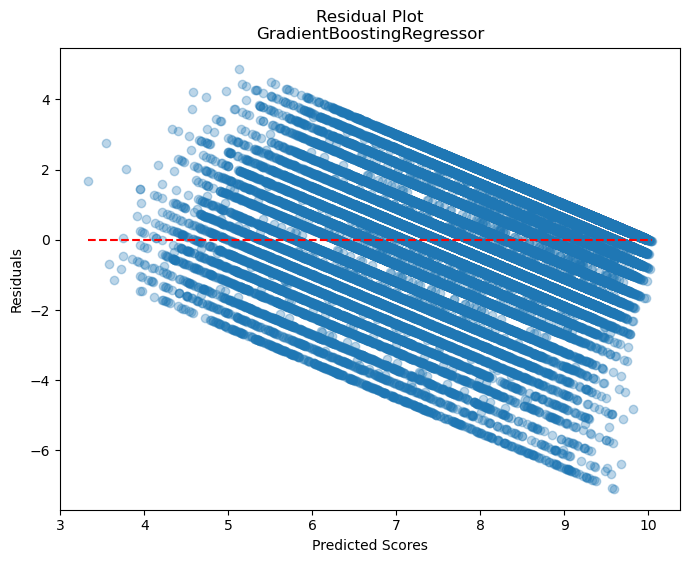

C:\Users\user\AppData\Local\Temp\ipykernel_14756\3186599264.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14756\3186599264.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, label='Predicted', shade=True)


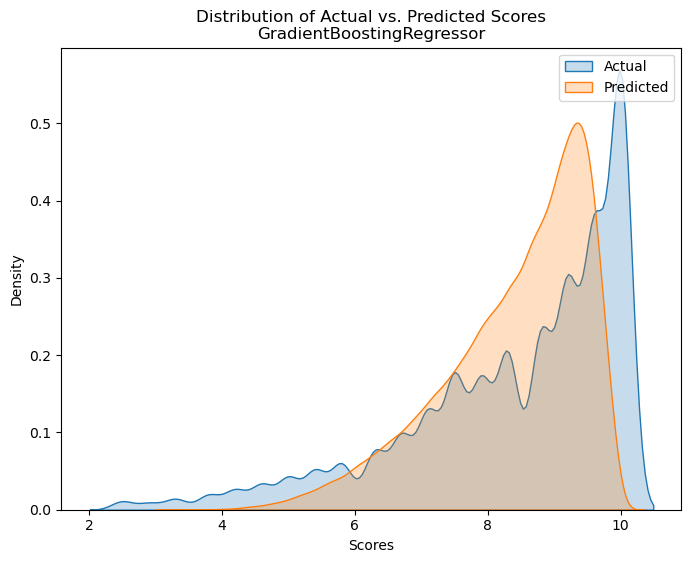

In [25]:
# Plot for Gradient Boosting Regressor
plot_scatter(y_test, pred_gbr, model="GradientBoostingRegressor")
plot_residuals(y_test, pred_gbr, model="GradientBoostingRegressor")
plot_distribution(y_test, pred_gbr, model="GradientBoostingRegressor")

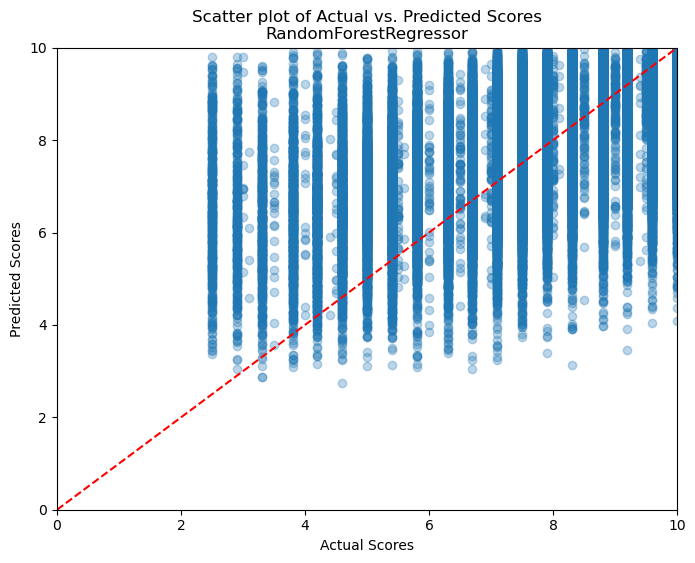

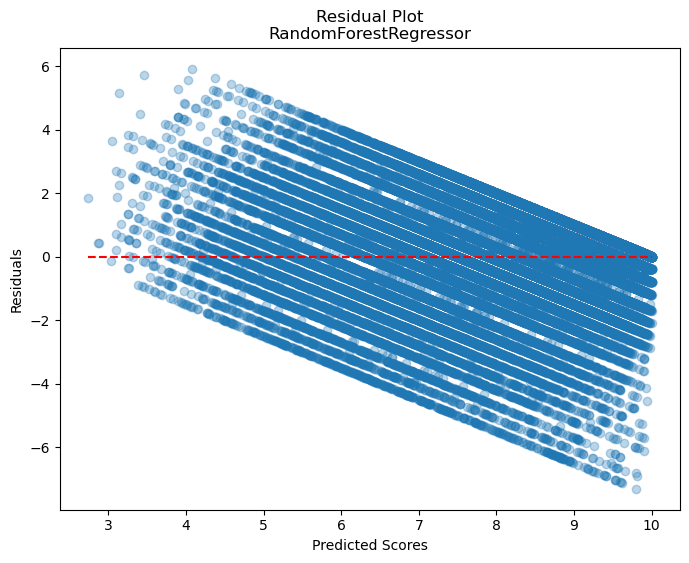

C:\Users\user\AppData\Local\Temp\ipykernel_14756\3186599264.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14756\3186599264.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, label='Predicted', shade=True)


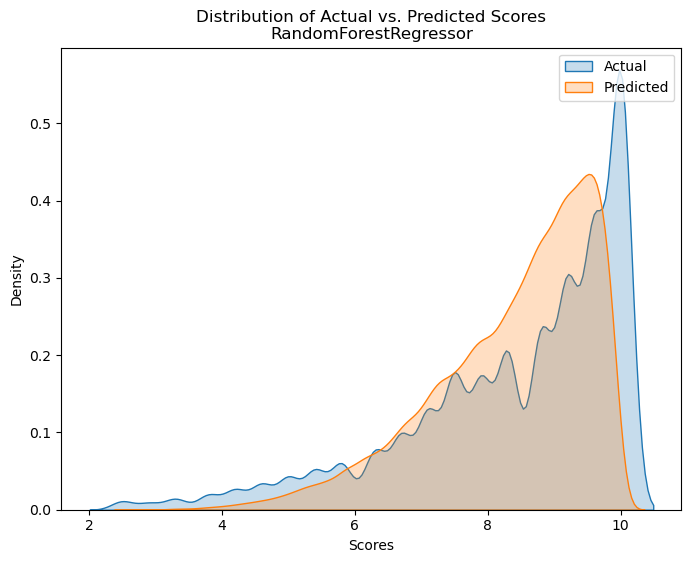

In [26]:
# Plot for Random Forest Regressor
plot_scatter(y_test, pred_rf, model="RandomForestRegressor")
plot_residuals(y_test, pred_rf, model="RandomForestRegressor")
plot_distribution(y_test, pred_rf, model="RandomForestRegressor")


C:\Users\user\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


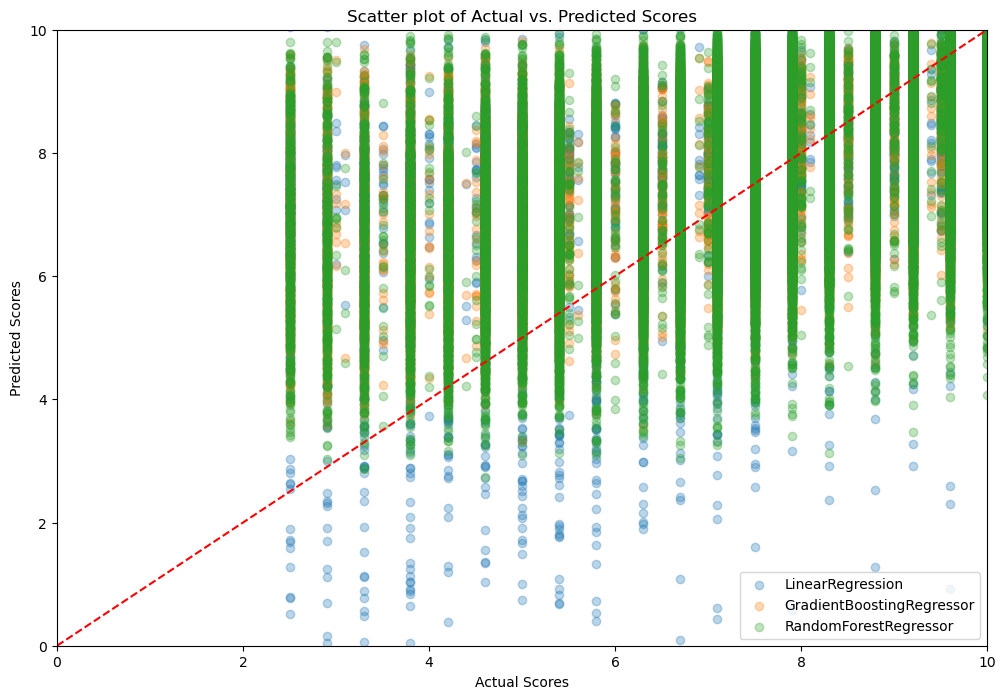

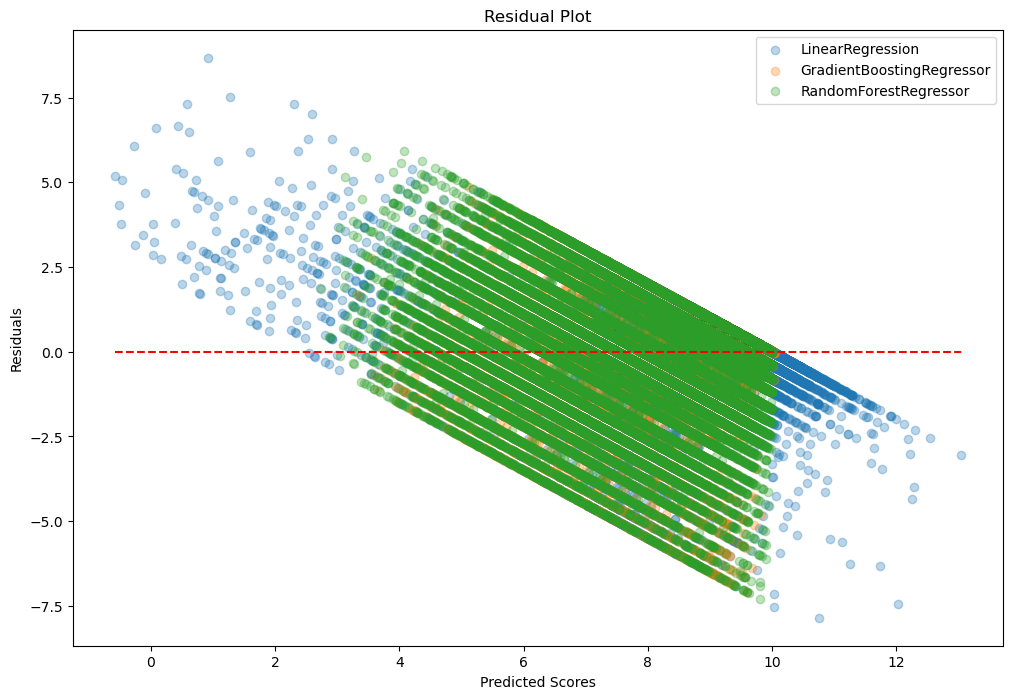

C:\Users\user\AppData\Local\Temp\ipykernel_14756\3120738835.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14756\3120738835.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, label=model, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14756\3120738835.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, label=model, shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14756\3120738835.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.

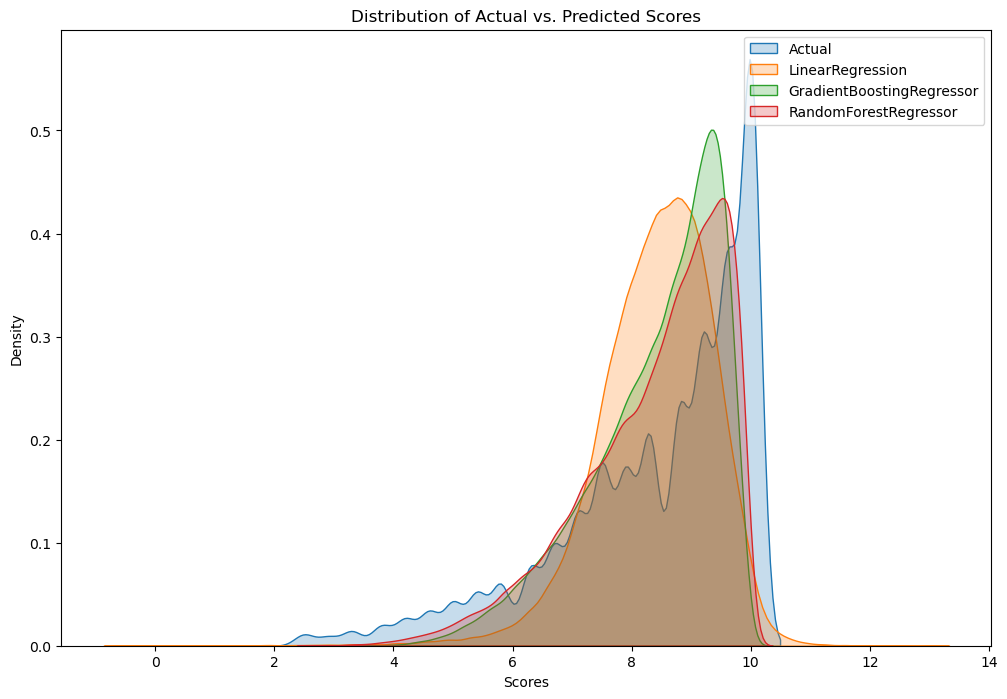

In [27]:
# Combined Plots
preds = [pred_lr, pred_gbr, pred_rf]
model_names = ["LinearRegression", "GradientBoostingRegressor", "RandomForestRegressor"]

combined_plot(y_test, preds, model_names, plot_type='scatter')
combined_plot(y_test, preds, model_names, plot_type='residual')
combined_plot(y_test, preds, model_names, plot_type='distribution')